Importing required libraries.

In [ ]:
#Importing Panda for Basic Operation
import pandas as pd
#Importing Matplotlib and Seasborn for Various Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#For Style
from matplotlib import style
#Setting The Style as Seasborn
style.use('seaborn')
#For Splitting  The data arrays into 2 subsets: 1 for training data and another for testing data
from sklearn.model_selection import train_test_split
#For Data Pre processing
from sklearn import preprocessing
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
#For importing Models
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor





Loading the csv file.

In [ ]:
# Loading The Data from CSV file to Pandas Dataframe
dataset = pd.read_csv('car_data.csv')

In [ ]:
#Checking The number of Rows and Columns
dataset.shape

(3981, 8)

In [ ]:
#Inspecting 5 rows of Data from the Dataframe using head() function
dataset.head()

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner

In [ ]:
#detecting datatypes
dataset.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [ ]:
#Get The Information of The Dataset using info() fucntion [1]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3981 entries, 0 to 3980
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3981 non-null   object
 1   year           3981 non-null   int64 
 2   selling_price  3981 non-null   int64 
 3   km_driven      3981 non-null   int64 
 4   fuel           3981 non-null   object
 5   seller_type    3981 non-null   object
 6   transmission   3981 non-null   object
 7   owner          3981 non-null   object
dtypes: int64(3), object(5)
memory usage: 248.9+ KB


In [ ]:
#Checking The Distribution of Catagorical Data
print(dataset.fuel.value_counts())
print(dataset.seller_type.value_counts())
print(dataset.transmission.value_counts())
print(dataset.owner.value_counts())



Diesel      1912
Petrol      1835
CNG          209
LPG           24
Electric       1
Name: fuel, dtype: int64
Individual          3046
Dealer               899
Trustmark Dealer      36
Name: seller_type, dtype: int64
Manual       3462
Automatic     519
Name: transmission, dtype: int64
First Owner             2403
Second Owner            1136
Third Owner              346
Fourth & Above Owner      79
Test Drive Car            17
Name: owner, dtype: int64


In [ ]:
#To remove unwanted portion of a value
#dataset['Km']=dataset['KM'].str.replace('Kilo',' ')
#Here KM will br replaced with space
#Check Duplicate Rows
dataset.duplicated().sum()

202

In [ ]:
dataset.drop_duplicates()

name  year  selling_price  km_driven    fuel  \
0                Maruti 800 AC  2007          60000      70000  Petrol   
1     Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2         Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3       Datsun RediGO T Option  2017         250000      46000  Petrol   
4        Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   
...                        ...   ...            ...        ...     ...   
3976                Mazda Mx-5  2003        1400000      70000     CNG   
3977                Mazda Mx-5  2007        2100000      97000     CNG   
3978                Mazda Mx-5  2010        1900000       6590     CNG   
3979                Mazda Mx-5  2012        2000000      49957     CNG   
3980                Mazda Mx-5  2016        3100000      43235     CNG   

     seller_type transmission         owner  
0     Individual       Manual   First Owner  
1     Individual       Manual   First Owner  
2     Individual       Manual   First Owner  
3     Individual       Manual   First Owner  
4     Individual       Manual  Second Owner  
...          ...          ...           ...  
3976      Dealer    Automatic   Third Owner  
3977      Dealer       Manual  Second Owner  
3978      Dealer       Manual   First Owner  
3979      Dealer       Manual   First Owner  
3980      Dealer       Manual   First Owner  

[3779 rows x 8 columns]

In [ ]:
#Checking The Distribution of Numerical Data
print(dataset.name.value_counts())
print(dataset.year.value_counts())
print(dataset.selling_price.value_counts())
print(dataset.km_driven.value_counts())

Maruti Swift Dzire VDI              55
Maruti Alto 800 LXI                 50
Maruti Alto LXi                     44
Maruti Alto LX                      33
Hyundai EON Era Plus                30
                                    ..
Renault Pulse RxL                    1
Honda Brio Exclusive Edition         1
Hyundai Verna Transform SX VTVT      1
Maruti Swift Dzire ZXI 1.2 BS IV     1
Maruti Swift Dzire LDI Optional      1
Name: name, Length: 1626, dtype: int64
2017    384
2012    369
2015    358
2014    337
2018    328
2016    324
2013    324
2011    261
2010    233
2019    190
2009    187
2008    144
2007    124
2006    100
2005     76
2020     55
2004     50
2003     31
2002     26
2001     21
1998     15
2000     13
1999     10
2021      9
1995      5
1997      3
1996      2
1992      1
2022      1
Name: year, dtype: int64
300000     148
250000     119
350000     108
500000      93
550000      89
          ... 
291000       1
1125000      1
263000       1
217000       1
3300000  

In [ ]:
#For all Columns use column method
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
#For Numerical representation of the Dataset(Count, Mean, STD, Min, Percentage, Max) use describe() function
dataset.describe()

year  selling_price      km_driven
count  3981.000000   3.981000e+03    3981.000000
mean   2012.917609   5.700669e+05   69151.633007
std       4.420799   7.036563e+05   47227.557280
min    1992.000000   2.000000e+04       1.000000
25%    2010.000000   2.100000e+05   37000.000000
50%    2013.000000   3.700000e+05   60000.000000
75%    2016.000000   6.500000e+05   90000.000000
max    2022.000000   8.900000e+06  806599.000000

# **Individual Histogram for the numerical features. 3 Histograms for year, selling_price and km_driven are given below.**

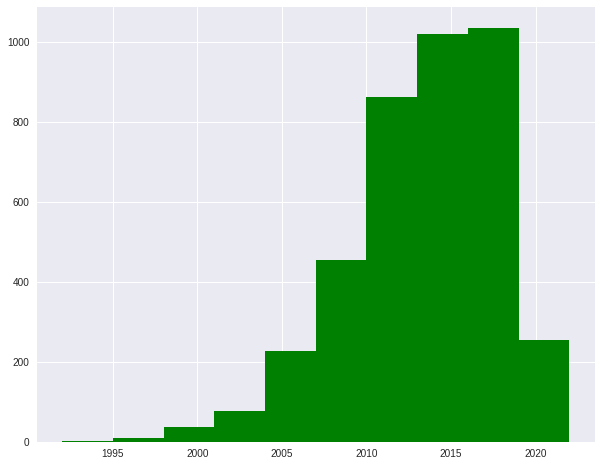

In [ ]:
#Histogram for the numerical features [2]
#sns.distplot(dataset['year'])
plt.figure(figsize=(10,8))
dataset['year'].hist(bins=10, color='green')
#bins=Intervals
plt.show()

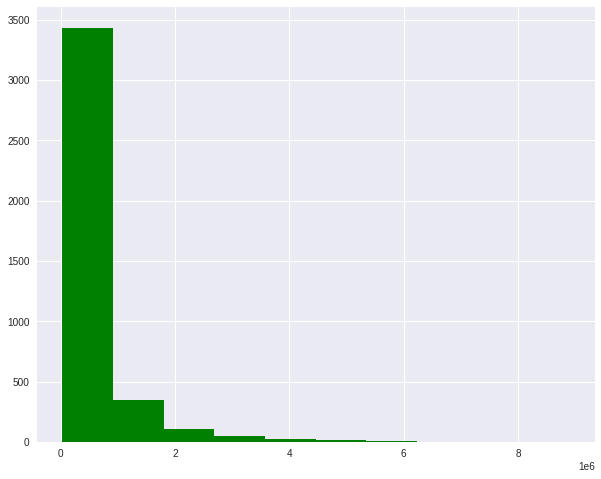

In [ ]:
plt.figure(figsize=(10,8))
dataset['selling_price'].hist(bins=10, color='green')
plt.show()

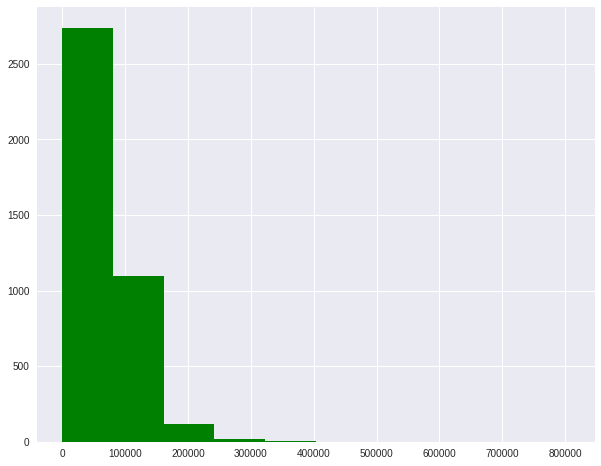

In [ ]:
plt.figure(figsize=(10,8))
dataset['km_driven'].hist(bins=10, color='green')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


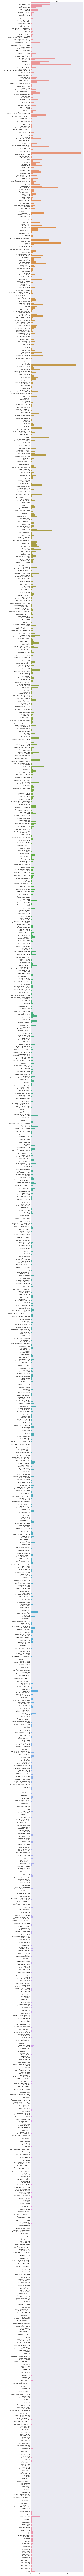

In [ ]:
#For Name Column in the Dataset with its Count use countplot() function
plt.figure(figsize=(10,500))
#Flagsize(Width,Height)
sns.countplot(y='name', data=dataset)
#Plot Title
plt.title('Name')
#Display Plot
plt.show()


# **Individual Bar Chart for the categorical features. Since we have 4 categorical features so 4 bar charts are ploted. They are name, fuel, seller_type, transmission and owner.**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


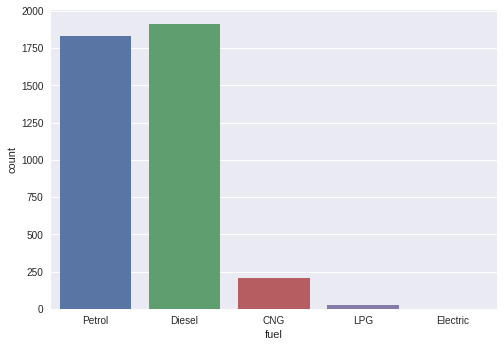

In [ ]:
#bar chart for Fuel Type
sns.countplot(dataset['fuel'])


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


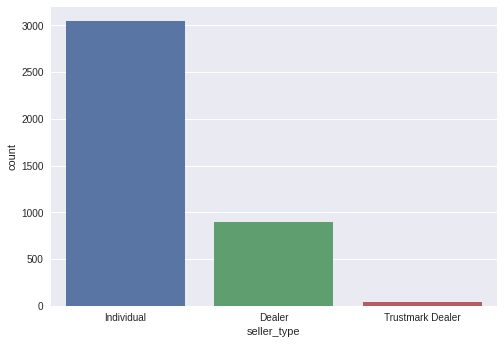

In [ ]:
#bar chart for Seller Type
sns.countplot(dataset['seller_type'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


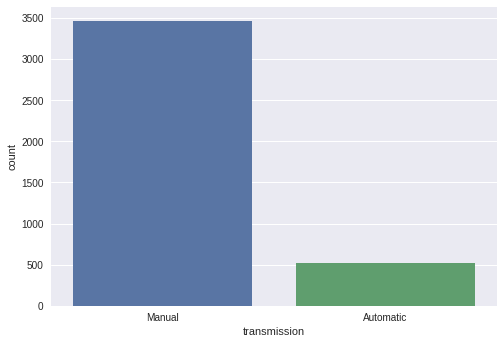

In [ ]:
#bar chart for Transmmison Type
sns.countplot(dataset['transmission'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


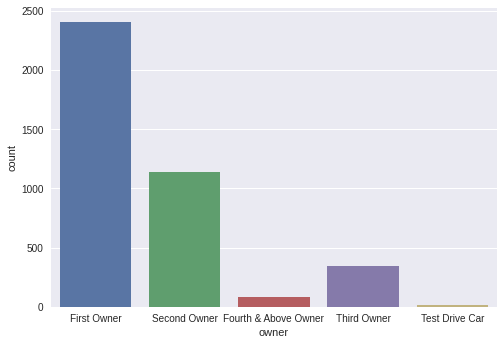

In [ ]:
#bar chart for Owner Type
sns.countplot(dataset['owner'])

# **Bar plot for Categorical vs categorical. Since we have 4 categorical os random 6 barplots are ploted**

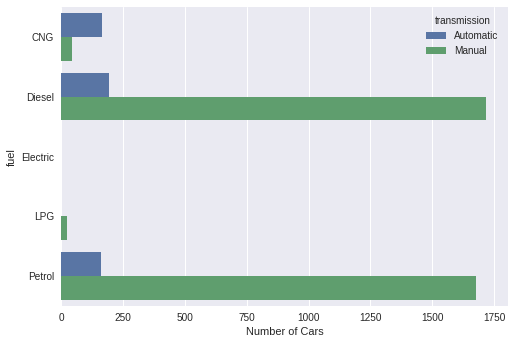

In [ ]:
#barplot for Fuel Type vs Transmission Type
sns.barplot(x="Number of Cars",
            y="fuel",
            hue="transmission",
            data=dataset.groupby(["fuel", "transmission"]).size().to_frame("Number of Cars").reset_index())

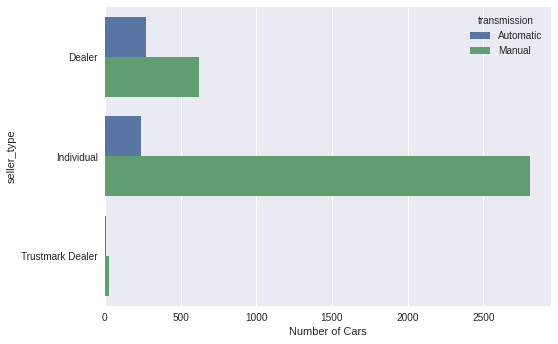

In [ ]:
#barplot for Seller Type vs Transmission Type
sns.barplot(x="Number of Cars",
            y="seller_type",
            hue="transmission",
            data=dataset.groupby(["seller_type", "transmission"]).size().to_frame("Number of Cars").reset_index())

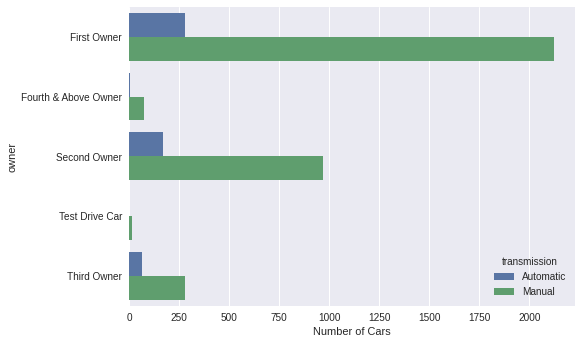

In [ ]:
#barplot for Owner Type vs Transmission Type
sns.barplot(x="Number of Cars",
            y="owner",
            hue="transmission",
            data=dataset.groupby(["owner", "transmission"]).size().to_frame("Number of Cars").reset_index())

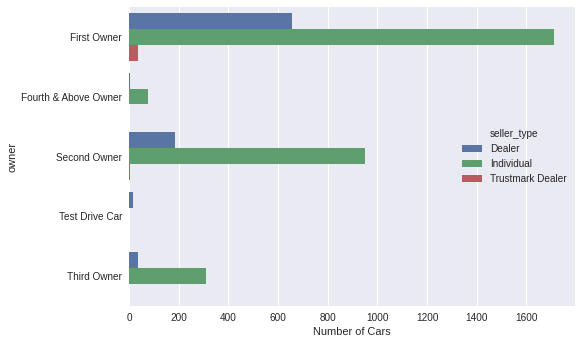

In [ ]:
#barplot for Owner Type vs Seller Type
sns.barplot(x="Number of Cars",
            y="owner",
            hue="seller_type",
            data=dataset.groupby(["owner", "seller_type"]).size().to_frame("Number of Cars").reset_index())

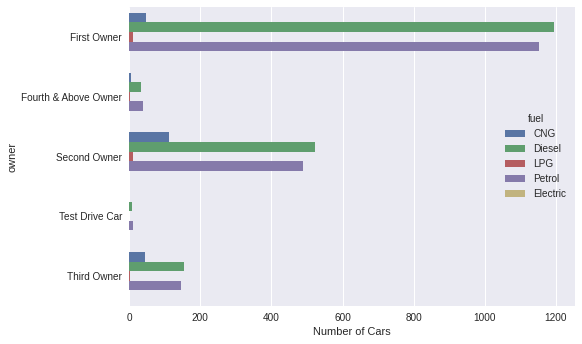

In [ ]:
#barplot for Owner Type vs Fuel Type
sns.barplot(x="Number of Cars",
            y="owner",
            hue="fuel",
            data=dataset.groupby(["owner", "fuel"]).size().to_frame("Number of Cars").reset_index())

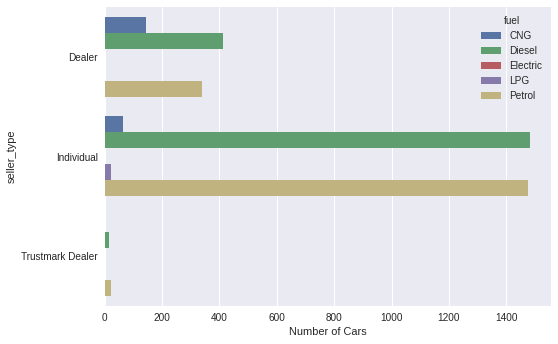

In [ ]:
#barplot for Seller Type vs Fuel Type
sns.barplot(x="Number of Cars",
            y="seller_type",
            hue="fuel",
            data=dataset.groupby(["seller_type", "fuel"]).size().to_frame("Number of Cars").reset_index())

# **Bar plot for Categorical vs Numerical. Random 3 barplots are shown below**

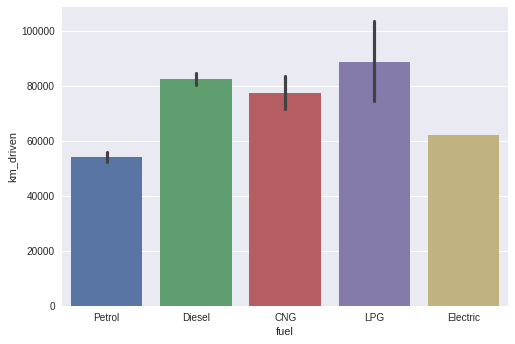

In [ ]:
#bar plot for Fuel Type vs Km Driven
sns.barplot(x=dataset['fuel'], y=dataset['km_driven'])

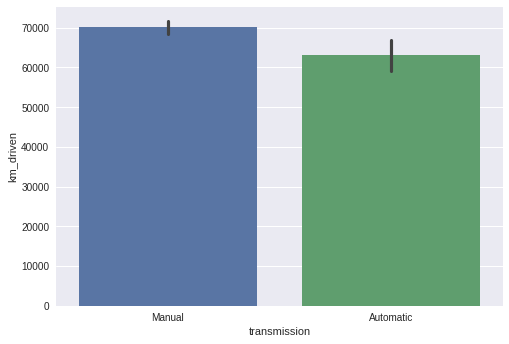

In [ ]:
#bar plot for Transmission Type vs Km Driven
sns.barplot(x=dataset['transmission'], y=dataset['km_driven'])

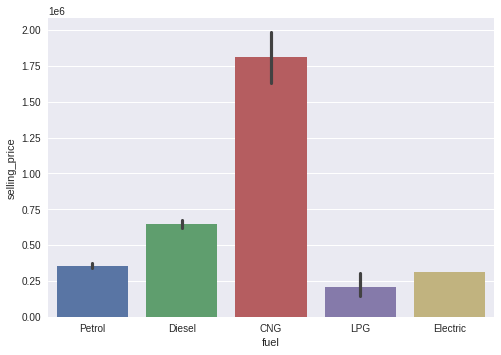

In [ ]:
#bar plot for Fuel type vs selling price
sns.barplot(x=dataset['fuel'], y=dataset['selling_price'])

# **Numerical vs Numerical pairplot. 3 plots are shown below.**

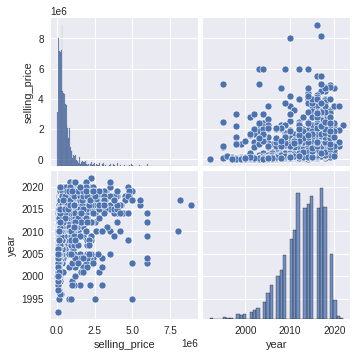

In [ ]:
#pairplot for Selling Price vs Year Purchased
sns.pairplot(dataset, vars=["selling_price","year"])

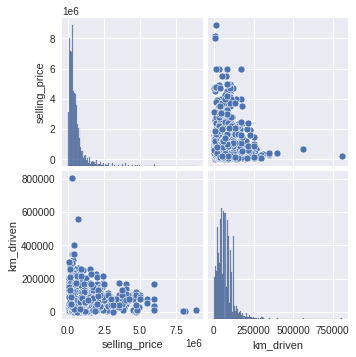

In [ ]:
#pairlpot for Selling Price vs Km Driven
sns.pairplot(dataset, vars=["selling_price","km_driven"])

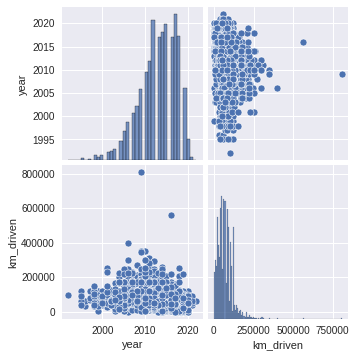

In [ ]:
#pairlpot for Year Purchased vs Km Driven
sns.pairplot(dataset, vars=["year","km_driven"])

# **Missing data handling. by checking the missing values we find that there is no null values in any column of the dataset.**

In [ ]:
#Check the misiing Values using isnull().sum() function
dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

# **Stratified sampling on survived class**

In [ ]:
#Stratified sampling
#Disproportionate Sampling
#For each subgroup to have a similar level of variance, Sampling should be a similar sample size for each subgroup
#Since Not all Sub group have 10 Sample. There will be an Error as Sample size is larger than Population
#Only for Categorical features
# Randomly Choosing Sample from 60% of Each Type of Fuel Type
dataset.groupby('fuel', group_keys=False).apply(lambda x: x.sample(frac=0.6))


name  year  selling_price  km_driven  \
3947                          Toyota Camry  2017        2200000     105000   
3971                     Mitsubishi Pickup  2004        1700000      83000   
3972                       Toyota Vellfire  2019         800000      20000   
3857                  Toyota Hiace GL 2017  2022        2250000      60000   
3927            Mitshubishi Lancer Evo VII  2004        2200000      35000   
...                                    ...   ...            ...        ...   
446              Tata Zest Revotron 1.2 XT  2015         380000      17152   
2722  Ford Ecosport 1.5 Ti VCT AT Titanium  2014         475000      48000   
1001                      Maruti Esteem VX  1999          60000      35000   
669                    Maruti Alto 800 LXI  2006         165000     132000   
1552                       Maruti Alto LXi  2008          70000      90000   

        fuel seller_type transmission         owner  
3947     CNG      Dealer    Automatic  Second Owner  
3971     CNG      Dealer    Automatic  Second Owner  
3972     CNG      Dealer    Automatic   Third Owner  
3857     CNG      Dealer    Automatic  Second Owner  
3927     CNG      Dealer    Automatic  Second Owner  
...      ...         ...          ...           ...  
446   Petrol  Individual       Manual   First Owner  
2722  Petrol      Dealer    Automatic  Second Owner  
1001  Petrol  Individual       Manual  Second Owner  
669   Petrol  Individual       Manual   First Owner  
1552  Petrol  Individual       Manual  Second Owner  

[2388 rows x 8 columns]

In [ ]:
# Randomly Choose 10 Samples from Each Type of Seller
dataset.groupby('seller_type', group_keys=False).apply(lambda x: x.sample(10))

name  year  selling_price  km_driven  \
1280                   Honda Jazz VX CVT  2016         580000      32000   
2448            Toyota Etios Liva 1.4 VD  2017         425000      36000   
2268                   Hyundai i10 Magna  2012         229999      49824   
3377      Maruti Eeco Smiles 5 Seater AC  2016         330000      72500   
913   Skoda Laura Ambiente 2.0 TDI CR MT  2012         385000      52000   
4302                  BMW 7 Series 730Ld  2006        1050000      30000   
2622                Ford Figo Diesel EXI  2012         250000     156040   
3265             Maruti Zen LXi - BS III  2005         125000      34000   
1236              Maruti Swift Dzire VXi  2009         250000      80659   
3198               Honda Amaze S i-Vtech  2015         450000      43192   
687            Tata Zest Revotron 1.2 XT  2014         400000      35000   
2799                Honda Amaze E i-VTEC  2017         430000      15000   
3834              Hyundai Grand i10 Asta  2014         450000      80000   
3256              Chevrolet Cruze LTZ AT  2015         650000      50000   
3979        Mahindra Verito 1.5 D2 BSIII  2011         150000     280000   
3955            Tata Indigo CS eLS BS IV  2011         180000     120000   
871                Hyundai i20 1.2 Spotz  2017         400000      38000   
4195                Maruti SX4 Zxi BSIII  2007         160000      80000   
4206           Hyundai i20 Active 1.2 SX  2015         565000      46000   
3164                  Maruti Celerio ZDi  2015         350000     120000   
2272           Hyundai Verna 1.6 VTVT SX  2015         760000      55340   
904                Maruti Swift ZXI BSIV  2016         670000       7104   
607            Hyundai Verna 1.6 VTVT SX  2015         760000      55340   
620               Toyota Fortuner 4x2 AT  2017        2600000      47162   
2263                   Maruti Ertiga VXI  2015         625000      11918   
589               Maruti Swift Dzire VDI  2017         600000      46507   
544                    Renault Pulse RxL  2015         390000      61585   
1622               Maruti Ciaz 1.4 Alpha  2017         780000      31063   
4098                     Honda Brio S MT  2013         295000      57353   
2743               Maruti Swift ZXI BSIV  2016         670000       7104   

        fuel       seller_type transmission         owner  
1280  Petrol            Dealer    Automatic   First Owner  
2448  Diesel            Dealer       Manual   First Owner  
2268  Petrol            Dealer       Manual   First Owner  
3377  Petrol            Dealer       Manual   First Owner  
913   Diesel            Dealer       Manual   First Owner  
4302  Diesel            Dealer    Automatic   First Owner  
2622  Diesel            Dealer       Manual   First Owner  
3265  Petrol            Dealer       Manual   First Owner  
1236  Petrol            Dealer       Manual   First Owner  
3198  Petrol            Dealer       Manual   First Owner  
687   Petrol        Individual       Manual   First Owner  
2799  Petrol        Individual       Manual   First Owner  
3834  Petrol        Individual       Manual  Second Owner  
3256  Diesel        Individual    Automatic   First Owner  
3979  Diesel        Individual       Manual   First Owner  
3955  Diesel        Individual       Manual   First Owner  
871   Petrol        Individual       Manual  Second Owner  
4195  Petrol        Individual       Manual   Third Owner  
4206  Petrol        Individual       Manual   First Owner  
3164  Diesel        Individual       Manual   First Owner  
2272  Petrol  Trustmark Dealer       Manual   First Owner  
904   Petrol  Trustmark Dealer       Manual   First Owner  
607   Petrol  Trustmark Dealer       Manual   First Owner  
620   Diesel  Trustmark Dealer    Automatic   First Owner  
2263  Petrol  Trustmark Dealer       Manual   First Owner  
589   Diesel  Trustmark Dealer       Manual   First Owner  
544   Diesel  Trustmark Dealer       Manual   First Owner  

In [ ]:
# Randomly Choose 10 Samples from Each Type of Transmission
dataset.groupby('transmission', group_keys=False).apply(lambda x: x.sample(10))

name  year  selling_price  km_driven  \
1634                Mahindra TUV 300 T8 AMT  2016         730000      60000   
4389                Toyota Axio Hybrid 2014  2020        1386000      69000   
191    Mercedes-Benz New C-Class 220 CDI AT  2013        1500000      35000   
3416                 Toyota Fortuner 4x2 AT  2014        1800000      99000   
935   Volkswagen Jetta 2.0L TDI Highline AT  2012         735000      55300   
1093                 Chevrolet Cruze LTZ AT  2017         950000      73000   
2712          Honda City 1.5 V AT Exclusive  2008         210000      77000   
2598                       BMW X1 sDrive20d  2011         890000      86000   
690                    Maruti Swift AMT VXI  2018         600000      18000   
2450                Maruti Ciaz 1.4 AT Zeta  2017         500000      40000   
378               Hyundai i20 Sportz Petrol  2010         250000      40000   
4238           Hyundai Grand i10 CRDi Magna  2017         490000      66000   
3317              Hyundai Verna CRDi 1.6 SX  2017         900000      50000   
2395                  Maruti Swift ZXI Plus  2018         600000      30000   
761                   Tata Indica GLS BS IV  2009          68000     120000   
1950                      Maruti Ertiga VDI  2014         480000     110000   
1347          Hyundai Verna 1.6 SX CRDi (O)  2012         450000     110000   
413                  Chevrolet Spark 1.0 LS  2008          75000      35000   
740                     Maruti SX4 Vxi BSIV  2012         225000     110000   
392                Maruti Wagon R LXI Minor  2007          95000      80000   

        fuel seller_type transmission         owner  
1634  Diesel  Individual    Automatic  Second Owner  
4389     CNG  Individual    Automatic   Third Owner  
191   Diesel  Individual    Automatic   First Owner  
3416  Diesel  Individual    Automatic   First Owner  
935   Diesel      Dealer    Automatic   First Owner  
1093  Diesel      Dealer    Automatic   First Owner  
2712  Petrol  Individual    Automatic   Third Owner  
2598  Diesel  Individual    Automatic  Second Owner  
690   Petrol  Individual    Automatic   First Owner  
2450  Petrol  Individual    Automatic   First Owner  
378   Petrol  Individual       Manual   First Owner  
4238  Diesel      Dealer       Manual   First Owner  
3317  Diesel  Individual       Manual   First Owner  
2395  Petrol  Individual       Manual   First Owner  
761   Petrol  Individual       Manual  Second Owner  
1950  Diesel  Individual       Manual  Second Owner  
1347  Diesel  Individual       Manual  Second Owner  
413   Petrol  Individual       Manual  Second Owner  
740   Petrol  Individual       Manual  Second Owner  
392   Petrol  Individual       Manual   First Owner

In [ ]:
# Randomly Choose 10 Samples from Each Type of Owner
dataset.groupby('owner', group_keys=False).apply(lambda x: x.sample(10))

name  year  selling_price  \
3704                        Hyundai i10 Magna 1.1L  2014         295000   
2084                             Hyundai i10 Magna  2009         235000   
3548                              Renault KWID RXT  2016         300000   
620                         Toyota Fortuner 4x2 AT  2017        2600000   
1587                           Chevrolet Cruze LTZ  2012         400000   
1626                    Toyota Corolla Altis GL MT  2016        1150000   
575                      Hyundai Creta 1.6 CRDi SX  2016         535000   
4236               Hyundai Grand i10 1.2 CRDi Asta  2018         465000   
2677              Tata New Safari DICOR 2.2 VX 4x4  2012         450000   
102                        BMW X1 sDrive 20d xLine  2017        2750000   
673                            Maruti Alto K10 LXI  2015         138000   
1531                            Mahindra Quanto C4  2013         220000   
3624                        Fiat Punto 1.4 Emotion  2010         165000   
113                       Maruti Wagon R LXI Minor  2010         100000   
1167                   Maruti Swift Dzire Vdi BSIV  2011         215000   
1933                          Maruti Alto LXi BSII  2002         100000   
1608          Volkswagen Vento New Diesel Highline  2012         330000   
2823                        Hyundai Sonata 2.4L AT  2006         275000   
2097                          Hyundai Accent GLE 1  1999          60000   
2060            Tata New Safari Dicor EX 4X2 BS IV  2012         280000   
995                                Tata Indica LSI  2006          70000   
4437                              Honda Vezel 2014  2019        1696800   
4205       Ford Figo Aspire 1.5 TDCi Titanium Plus  2015         459999   
3847                   Tata Zest Revotron 1.2T XMS  2018         400000   
1820         Tata Manza Aura (ABS) Quadrajet BS IV  2012         180000   
361                    Hyundai Santro Xing GLS CNG  2010         130000   
359                           Maruti SX4 Vxi BSIII  2007         100000   
3098                               Maruti Ritz VXI  2011         250000   
1343                                Maruti Alto LX  2010         110000   
2650                    Hyundai i20 1.4 CRDi Magna  2012         350000   
1775  Ford EcoSport 1.5 Ti VCT MT Titanium BE BSIV  2020        1119000   
1795        Ford Ecosport 1.5 Petrol Titanium Plus  2019        1100000   
2359        Volkswagen Vento 1.5 TDI Highline BSIV  2019        1350000   
1716             Ford Ecosport 1.5 Diesel Titanium  2020        1000000   
1715                            Ford Figo Titanium  2020         635000   
2362         Ford Figo Aspire Titanium Plus Diesel  2019         894999   
3615                      Honda City i-VTEC CVT ZX  2018        1165000   
1714                Ford Freestyle Titanium Diesel  2020         784000   
2360          Renault KWID Climber 1.0 MT Opt BSIV  2020         541000   
1781                  Ford Freestyle Titanium Plus  2020         852000   
3049                               Toyota Etios VX  2012         220000   
1297                     Tata Manza Aura Quadrajet  2009         185000   
4416                           Toyota Noah si 2011  2016        1923600   
3542                        Maruti Swift Dzire VDI  2017         600000   
3215                                 Maruti 800 AC  2004          40000   
2066                         Maruti Swift VDI BSIV  2015         400000   
1225                Tata Indica Vista Quadrajet LX  2012         175000   
4425                            Toyota Allion 2004  2009        1176000   
3349                      Maruti Wagon R VXI Minor  2007          80000   
2652                           Mahindra Xylo E4 8S  2010         325000   

      km_driven    fuel       seller_type transmission                 owner  
3704      38500  Petrol        Individual       Manual           First Owner  
2084      67067  Petrol            Dealer       Manual        

# **Data balancing technique.**

In [ ]:
#Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally. Example: itis like a ratio of 2-class clasification problem
#giving output like 80:20 or 90:10, where the Ml model is likely to get biased with one perticuler output.
#Regression over imbalanced data is not well explored. Because dealing with imbalanced data is a relevant problem that has been studied mostly in the context of classification tasks.

# **Normalization / Standardization for numerical**

In [ ]:
x_array = np.array(dataset['year'])
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

[[0.01580244 0.01580244 0.01584181 ... 0.01582606 0.01584181 0.01587331]]


In [ ]:
x_array = np.array(dataset['selling_price'])
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

[[0.00105015 0.00236284 0.01050153 ... 0.03325484 0.03500509 0.05425789]]


In [ ]:
x_array = np.array(dataset['km_driven'])
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

[[0.0132491  0.00946364 0.01892728 ... 0.00124731 0.0094555  0.00818321]]


Correlation Matrix

In [ ]:
#For Correlation Matrix using corr() Function
dataset.corr()
#For Heatmap
#sns.heatmap(dataset.corr())

year  selling_price  km_driven
year           1.000000       0.259794  -0.397587
selling_price  0.259794       1.000000  -0.099235
km_driven     -0.397587      -0.099235   1.000000

# **Fixing car name**

In [ ]:
dataset['name'].str.split(' ', n=5, expand=True)

0       1     2       3      4     5
0      Maruti     800    AC    None   None  None
1      Maruti   Wagon     R     LXI  Minor  None
2     Hyundai   Verna   1.6      SX   None  None
3      Datsun  RediGO     T  Option   None  None
4       Honda   Amaze    VX  i-DTEC   None  None
...       ...     ...   ...     ...    ...   ...
3976    Mazda    Mx-5  None    None   None  None
3977    Mazda    Mx-5  None    None   None  None
3978    Mazda    Mx-5  None    None   None  None
3979    Mazda    Mx-5  None    None   None  None
3980    Mazda    Mx-5  None    None   None  None

[3981 rows x 6 columns]

In [ ]:
dataset['company']=dataset['name'].apply(lambda x:" ".join(x.split()[0:1]))
#dataset['model']=dataset['name'].apply(lambda x:" ".join(x.split()[1:2]))
#dataset['edition']=dataset['name'].apply(lambda x:" ".join(x.split()[3:5]))
dataset.head()

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  company  
0  Individual       Manual   First Owner   Maruti  
1  Individual       Manual   First Owner   Maruti  
2  Individual       Manual   First Owner  Hyundai  
3  Individual       Manual   First Owner   Datsun  
4  Individual       Manual  Second Owner    Honda

In [ ]:
dataset['name']=dataset['name'].str.split(' ').str.slice(0,3).str.join(' ')
dataset

name  year  selling_price  km_driven    fuel seller_type  \
0         Maruti 800 AC  2007          60000      70000  Petrol  Individual   
1        Maruti Wagon R  2007         135000      50000  Petrol  Individual   
2     Hyundai Verna 1.6  2012         600000     100000  Diesel  Individual   
3       Datsun RediGO T  2017         250000      46000  Petrol  Individual   
4        Honda Amaze VX  2014         450000     141000  Diesel  Individual   
...                 ...   ...            ...        ...     ...         ...   
3976         Mazda Mx-5  2003        1400000      70000     CNG      Dealer   
3977         Mazda Mx-5  2007        2100000      97000     CNG      Dealer   
3978         Mazda Mx-5  2010        1900000       6590     CNG      Dealer   
3979         Mazda Mx-5  2012        2000000      49957     CNG      Dealer   
3980         Mazda Mx-5  2016        3100000      43235     CNG      Dealer   

     transmission         owner  company  
0          Manual   First Owner   Maruti  
1          Manual   First Owner   Maruti  
2          Manual   First Owner  Hyundai  
3          Manual   First Owner   Datsun  
4          Manual  Second Owner    Honda  
...           ...           ...      ...  
3976    Automatic   Third Owner    Mazda  
3977       Manual  Second Owner    Mazda  
3978       Manual   First Owner    Mazda  
3979       Manual   First Owner    Mazda  
3980       Manual   First Owner    Mazda  

[3981 rows x 9 columns]

# **Dropping Inital Name and edition Features**

In [ ]:
#dataset.drop(columns=['name','edition','model'],inplace=True)
#dataset.head()

# **Dropping Rows containing certain feature values due to small data sample**

In [ ]:
dataset.drop(dataset.index[(dataset["seller_type"] == "Trustmark Dealer")],axis=0,inplace=True)
dataset.drop(dataset.index[(dataset["fuel"] == "LPG")],axis=0,inplace=True)
dataset.drop(dataset.index[(dataset["fuel"] == "Electric")],axis=0,inplace=True)
dataset.drop(dataset.index[(dataset["owner"] == "Test Drive Car")],axis=0,inplace=True)
dataset.drop(dataset.index[(dataset["owner"] == "Fourth & Above Owner")],axis=0,inplace=True)

# **Saving the updated dataset**

In [ ]:
dataset.to_csv('clean_car_data.csv')

# **Spliting the data and target**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


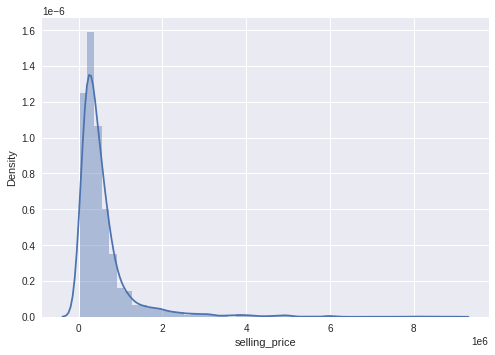

In [ ]:
sns.distplot(dataset['selling_price'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


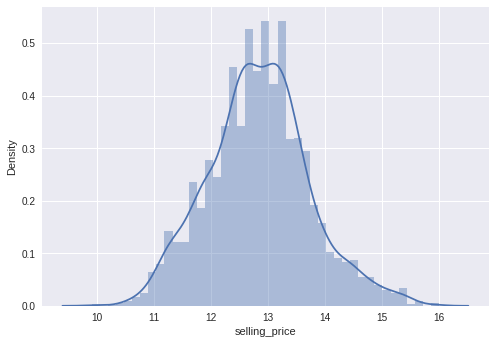

In [ ]:
sns.distplot(np.log(dataset['selling_price']))

In [ ]:
X=dataset.drop(columns=['selling_price'])
y=np.log(dataset['selling_price'])

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
dataset.head()

name  year  selling_price  km_driven    fuel seller_type  \
0      Maruti 800 AC  2007          60000      70000  Petrol  Individual   
1     Maruti Wagon R  2007         135000      50000  Petrol  Individual   
2  Hyundai Verna 1.6  2012         600000     100000  Diesel  Individual   
3    Datsun RediGO T  2017         250000      46000  Petrol  Individual   
4     Honda Amaze VX  2014         450000     141000  Diesel  Individual   

  transmission         owner  company  
0       Manual   First Owner   Maruti  
1       Manual   First Owner   Maruti  
2       Manual   First Owner  Hyundai  
3       Manual   First Owner   Datsun  
4       Manual  Second Owner    Honda

One Hot Encoding

In [ ]:
ohe=OneHotEncoder()
ohe.fit(X[['name','fuel','seller_type','transmission','owner','company']])

OneHotEncoder()

In [ ]:
ohe.categories_

[array(['Ambassador CLASSIC 1500', 'Ambassador Grand 1800', 'Audi A4 1.8',
        'Audi A4 2.0', 'Audi A4 3.0', 'Audi A4 30', 'Audi A4 35',
        'Audi A4 New', 'Audi A5 Sportback', 'Audi A6 2.0', 'Audi A6 2.7',
        'Audi A6 2.8', 'Audi A8 2013', 'Audi A8 4.2', 'Audi A8 L',
        'Audi Q3 2.0', 'Audi Q3 35', 'Audi Q5 2.0', 'Audi Q5 3.0',
        'Audi Q7 35', 'Audi RS7 2015-2019', 'BMW 3 Series', 'BMW 5 Series',
        'BMW 7 Series', 'BMW X1 sDrive', 'BMW X1 sDrive20d', 'BMW X5 2004',
        'BMW X5 xDrive', 'Chevrolet Aveo 1.4', 'Chevrolet Aveo 1.6',
        'Chevrolet Aveo U-VA', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Captiva 2.0L', 'Chevrolet Captiva LT',
        'Chevrolet Cruze LT', 'Chevrolet Cruze LTZ', 'Chevrolet Enjoy 1.3',
        'Chevrolet Enjoy TCDi', 'Chevrolet Optra 1.6',
        'Chevrolet Optra Magnum', 'Chevrolet Sail 1.2',
        'Chevrolet Sail 1.3', 'Chevrolet Sail Hatchback',


#**Models**

**1.Linear Regression**

In [ ]:
#make_column_transformer(*transformers, remainder='drop/passthrough')
#remainder{‘drop’, ‘passthrough’}
#By default, only the specified columns in transformers are transformed and combined in the output, and the non-specified columns are dropped. (default of 'drop').
#By specifying remainder='passthrough', all remaining columns that were not specified in transformers will be automatically passed through.
#This subset of columns is concatenated with the output of the transformers. By setting remainder to be an estimator, the remaining non-specified columns will use the remainder estimator.
#The estimator must support fit and transform.

step1=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','fuel','seller_type','transmission','owner','company']), remainder='passthrough')

step2=LinearRegression()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)


print('Linear Regression')
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


Linear Regression
R2_score 0.8779001515213647
MAE 0.2176836136454028


**2.KNN**

In [ ]:
step1=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','fuel','seller_type','transmission','owner','company']), remainder='passthrough')

step2=KNeighborsRegressor()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('KNN')
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

KNN
R2_score 0.3358291020786007
MAE 0.5102851355714944


**3.Lasso Regression**

In [ ]:
#alpha : float, default=1.0, Constant that multiplies the L1 term, controlling regularization strength. alpha must be a non-negative float

step1=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','fuel','seller_type','transmission','owner','company']), remainder='passthrough')

step2=Lasso(alpha=0.0001)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('Lasso Regression')
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

Lasso Regression
R2_score 0.8799415661429404
MAE 0.22170464303959048


**4. Decision Tree**

In [ ]:
#max_depth is depth of the tree

step1=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','fuel','seller_type','transmission','owner','company']), remainder='passthrough')

step2=DecisionTreeRegressor(max_depth=11)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('Decision Tree')
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

Decision Tree
R2_score 0.772134043424185
MAE 0.3079566277051733


**5. Random Forest**

In [ ]:
#n_estimators, default=100 -> The number of trees in the forest.
#max_samplesint or float, default=None
#If bootstrap is True, the number of samples to draw from X to train each base estimator.
#max_features, default=1.0 -> The number of features to consider when looking for the best split.
# >If float, then max_features is a fraction and max(1, int(max_features * n_features_in_)) features are considered at each split.
#max_depth, default=None. -> The maximum depth of the tree

step1=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','fuel','seller_type','transmission','owner','company']), remainder='passthrough')

step2=RandomForestRegressor(n_estimators=100,
                            random_state=3,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=15
                            )

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('Random Forest')
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

Random Forest
R2_score 0.8426439988048374
MAE 0.26628353954999306


# **Finding out the best random_state number for Lasso Regresion**

In [ ]:
scores=[]
for i in range(100):
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=i)
    step2=Lasso(alpha=0.0001)
    pipe=Pipeline([
        ('step1',step1),
        ('step2',step2)
    ])

    pipe.fit(X_train,y_train)

    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.425839621467361, tolerance: 0.2495448548525918
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.100187537457828, tolerance: 0.2435880026954859
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3333047338545896, tolerance: 0.2396160226964241
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:609: Converge

In [ ]:
np.argmax(scores)
scores[np.argmax(scores)]

0.8799415661429404

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=np.argmax(scores))
step2=Lasso(alpha=0.0001)
pipe=Pipeline([
        ('step1',step1),
        ('step2',step2)
    ])
pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8799415661429404

**Exporting The Model**

In [ ]:
import pickle
pickle.dump(dataset,open('df.pkl','wb'))
pickle.dump(pipe,open('LassRegressionModel.pkl','wb'))

In [ ]:
car_model='Toyota Camry'
company='Toyota'
year=2020
km=60000
fuel_type='CNG'
seller_type='Dealer'
transmission='Automatic'
owner='First Owner'

In [ ]:
prediction=np.exp(pipe.predict(pd.DataFrame([[car_model,company, year,km,fuel_type,seller_type,transmission,owner]], columns=['name','company','year','km_driven','fuel','seller_type','transmission','owner'])))

In [ ]:
str(print(prediction[0]))

4551639.797898351


'None'